In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Perceptron
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('sahabatsaber-first-method.csv')
df.head()

,Unnamed: 0,Tweet,HS,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Gender
0,0,tinggal sesal sapa be emu orang tua happy peka...,0,0,0,0,0,0
1,1,kabar pantau,0,0,0,0,0,0
2,2,kerja bagus apresiasi,0,0,0,0,0,0
3,3,sebentar sebentar wali kota semarang kerja ganjar,0,0,0,0,0,0
4,4,selamat ulang umur sehat hidup berkat amin,0,0,0,0,0,0


In [3]:
# df.drop(columns=['Abusive'], inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.shape

(5714, 7)

In [4]:
df[df['HS_Gender'] == 1]

,Tweet,HS,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Gender
176,palkon botak urus ulama ngehekk sih otak cabul,1,1,0,0,0,1
315,open,1,0,1,0,0,1
1755,tambah orang cabul kacamata,1,0,1,0,0,1
2506,gue cewek tolol,1,1,0,0,0,1
3860,rengginang kaleng khong guan pas selesai puasa...,1,1,0,0,0,1
4954,kaleng de,1,1,0,0,0,1


['tunggu', 'komentar', 'raja', 'tipu', 'perintah', 'repot', 'mbak', 'lita', 'twitter', 'tolong', 'titip', 'es', 'sih', 'bungsu', 'lihat', 'salah', 'fokus', 'paspampresnya', 'aman', 'bayang', 'jokowi', 'senang', 'banget', 'blusuk', 'sehat', 'paspampresnya', 'nyali', 'ya', 'jokowi', 'nih', 'salah', 'menteri', 'kaleng2', 'jawab', 'turun', 'gunung', 'anak', 'turun', 'istana', 'warga', 'lukas', 'kader', 'ai', 'demokrat', 'sih', 'bersih2', 'ai', 'lukas', 'jaka', 'a', 'penuhin', 'undang', 'komisi', 'berantas', 'korupsi', 'mas', 'agus', 'susilo', 'bambang', 'yudhoyono', 'turun', 'gunung', 'oke', 'porang', 'umbi', 'umbi', 'indonesia', 'jepang', 'nama', 'lo', 'bahan', 'diet', 'kenyang', 'porang', 'ganti', 'terigu', 'anak', 'butuh', 'khusus', 'bisa', 'ya', 'sembah', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'y', 'nih', 'beliau', 'hidayat', 'cucu', 'diri', 'pabrik', 'jamu', 'muncul', 'goreng', 'mentah', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'hycgguhz

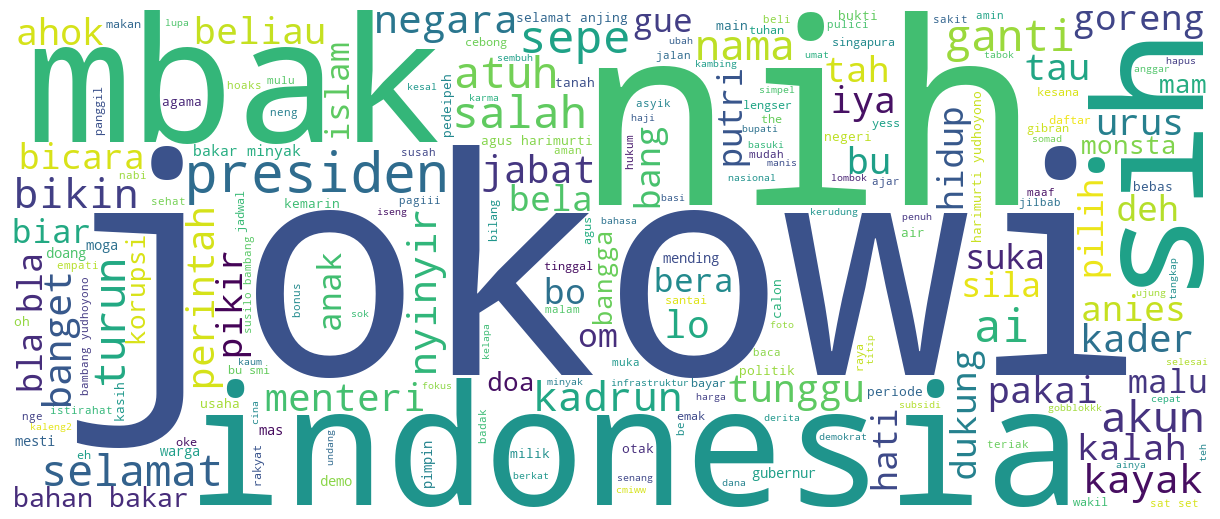

['tunggu', 'komentar', 'raja', 'mbak', 'lita', 'twitter', 'tolong', 'titip', 'es', 'sih', 'bungsu', 'lihat', 'salah', 'fokus', 'paspampresnya', 'aman', 'bayang', 'jokowi', 'senang', 'banget', 'blusuk', 'sehat', 'paspampresnya', 'nyali', 'ya', 'jokowi', 'nih', 'salah', 'menteri', 'kaleng2', 'jawab', 'turun', 'gunung', 'anak', 'turun', 'istana', 'warga', 'bisa', 'ya', 'nih', 'goreng', 'mentah', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'hycgguhzwm', 'mama', 'bo', 'kurang', 'subsidi', 'gas', '3', 'kg', 'naik', 'kasih', 'kompor', 'gas', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'hycgguhzwm', 'ai', 'emas', 'mudah', 'momen', 'berat', 'warga', 'hapus', 'subsidi', 'listrik', 'subsidi', 'gas', 'sama', 'efek', 'naik', 'bahan', 'bakar', 'minyak', 'sulit', 'mudah', 'bicara', 'jokowi', 'ups', 'asyik', 'mas', 'gibran', 'nyinyir', 'bapak', 'datang', 'langsung', 'he', 'he', 'he', 'halus', 'panggil', 'sari', 'nama', 'lengkap', 'baby', 'badak', 'gemoyy', 'lahi

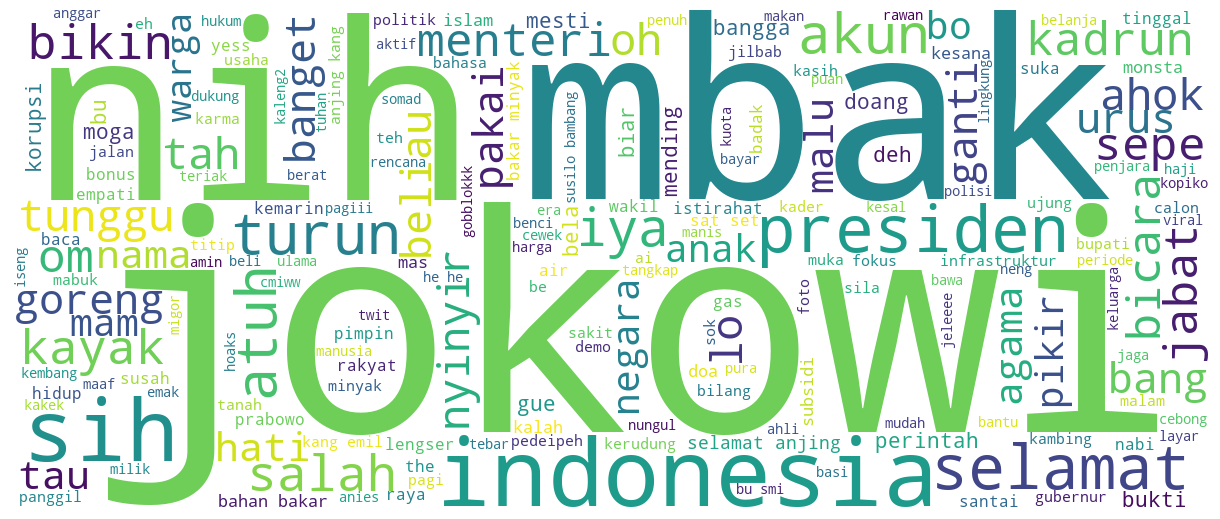

['tipu', 'perintah', 'repot', 'lukas', 'kader', 'ai', 'demokrat', 'sih', 'bersih2', 'ai', 'lukas', 'jaka', 'a', 'penuhin', 'undang', 'komisi', 'berantas', 'korupsi', 'mas', 'agus', 'susilo', 'bambang', 'yudhoyono', 'turun', 'gunung', 'oke', 'porang', 'umbi', 'umbi', 'indonesia', 'jepang', 'nama', 'lo', 'bahan', 'diet', 'kenyang', 'porang', 'ganti', 'terigu', 'anak', 'butuh', 'khusus', 'sembah', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'y', 'beliau', 'hidayat', 'cucu', 'diri', 'pabrik', 'jamu', 'muncul', 'tahu', 'mbak', 'emas', 'ai', 'demokrat', 'agus', 'harimurti', 'yudhoyono', 'kalah', 'pilih', 'gubernur', 'jakarta', 'ai', 'demokrat', 'kader', 'bebas', 'dukung', 'bu', 'yenny', 'be', 'emu', 'anies', 'rangka', 'sukses', 'juara', 'dunia', 'panjat', 'tebing', 'mana', 'bu', 'yenny', 'duduk', 'ketua', 'panjat', 'tebing', 'politik', 'indonesia', 'ngeleeeessss', 'urus', 'urus', 'banyak', 'andai', 'paksa', 'henti', 'ya', 'tenggelam', 'jadwal', 'pilih', 'santai', 'tanggap

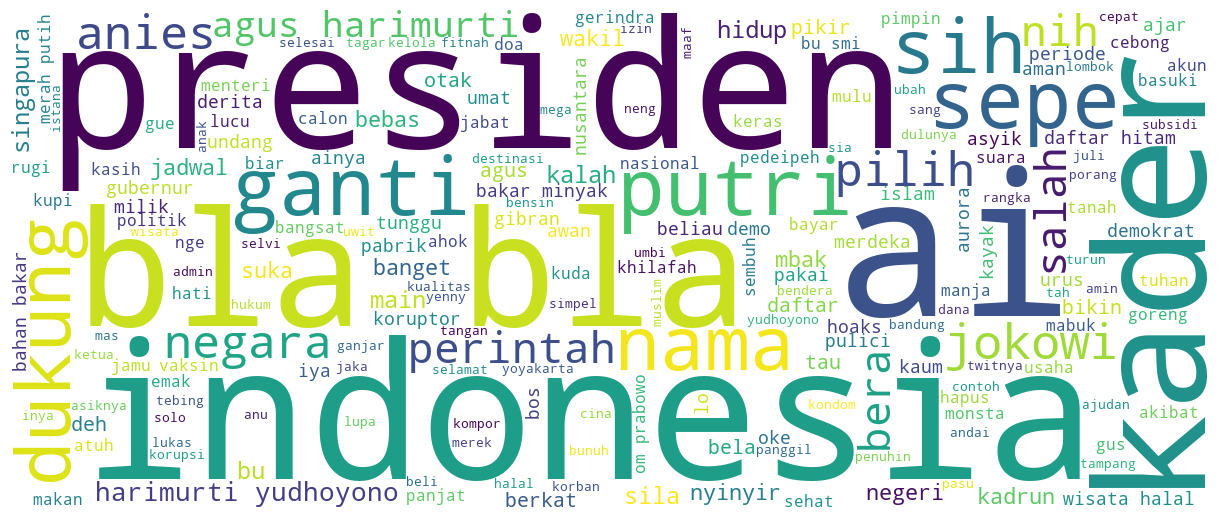

['turun', 'gunung', 'anak', 'turun', 'istana', 'warga', 'sembah', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'y', 'salah', 'ahok', 'ya', 'lombok', 'salah', 'destinasi', 'wisata', 'halal', 'destinasi', 'wisata', 'halal', 'look', 'wisata', 'hulul', 'halal', 'silent', 'mayoritas', 'pilih', 'baik', 'negeri', 'ai', 'yhaa', 'sila', 'pikir', 'bupati', 'ustaz', 'nu', 'mu', 'sebar', 'dakwah', 'akun', 'akun', 'garis', 'lurus', 'mesti', 'up', 'bentar', 'nih', 'panggil', 'kadal', 'gurun', 'jeleeee', 'hitam', 'sakit', 'huruf', 'kapital', 'tulis', 'agama', 'ya', 'kadal', 'gurun', 'jeleeee', 'salah', 'bang', 'emerson', 'mana', 'ya', 'bang', 'emerson', 'larang', 'siswa', 'pakai', 'jilbab', 'pakai', 'jilbab', 'siswi', 'karma', 'nyata', 'iya', 'halloo', 'saudara', 'boleee', '', '', 'kesana', 'biar', 'mabuk', 'agama', 'santuyy', 'karma', 'salah', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'v', 'kayak', 'bikin', 'islam', '', '', '', '', '', '', '', '', '', '', '',

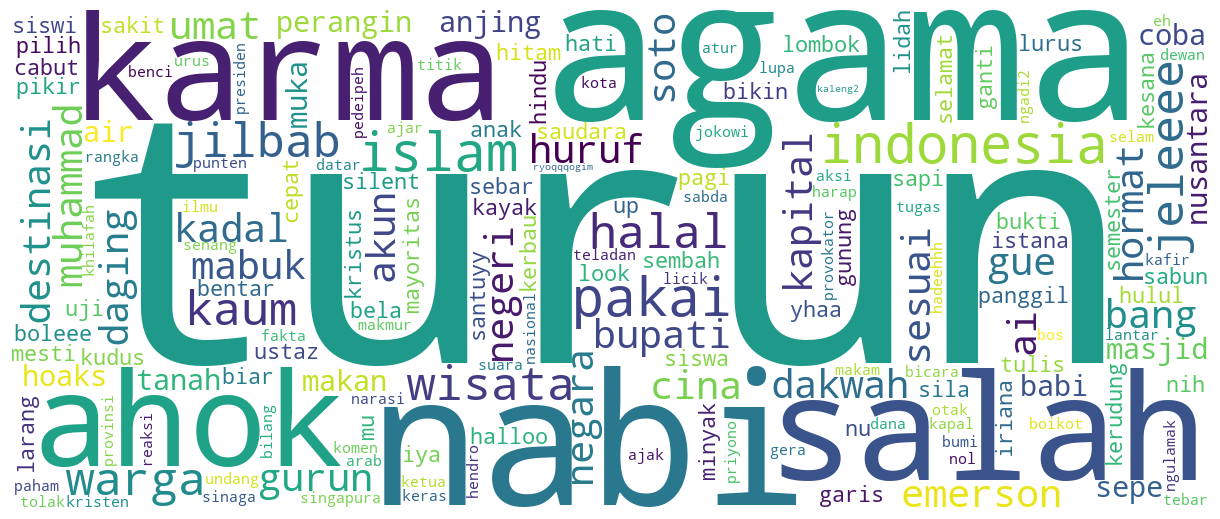

['lihat', 'sepe', 'i', 'nikah', 'putri', 'cina', 'bendera', 'merah', 'putih', 'presiden', 'jokowi', 'jerman', 'soto', 'kudus', 'soto', 'asal', 'negeri', 'cina', 'sesuai', 'lidah', 'indonesia', 'hormat', 'umat', 'hindu', 'daging', 'sapi', 'ganti', 'daging', 'kerbau', 'islam', 'indonesia', 'kaum', 'mabuk', 'agama', 'sepe', 'inya', 'aja', 'boikot', 'somad', 'naik', 'kunjung', 'wisatawan', 'singapura', 'anggap', 'negara', 'peduli', 'aman', 'warga', 'indonesia', 'cina', 'kafir', 'bang', 'john', 'meme', 'ya', 'istana']


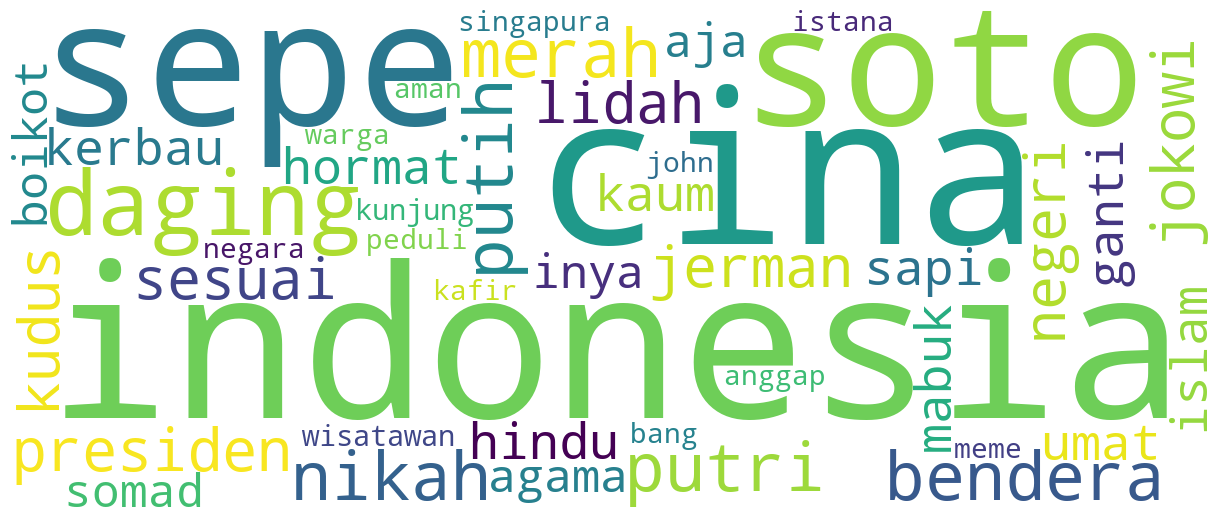

['palkon', 'botak', 'urus', 'ulama', 'ngehekk', 'sih', 'otak', 'cabul', 'open', 'tambah', 'orang', 'cabul', 'kacamata', 'gue', 'cewek', 'tolol', 'rengginang', 'kaleng', 'khong', 'guan', 'pas', 'selesai', 'puasa', '7', 'ya', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'e', 'kaleng', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'de']


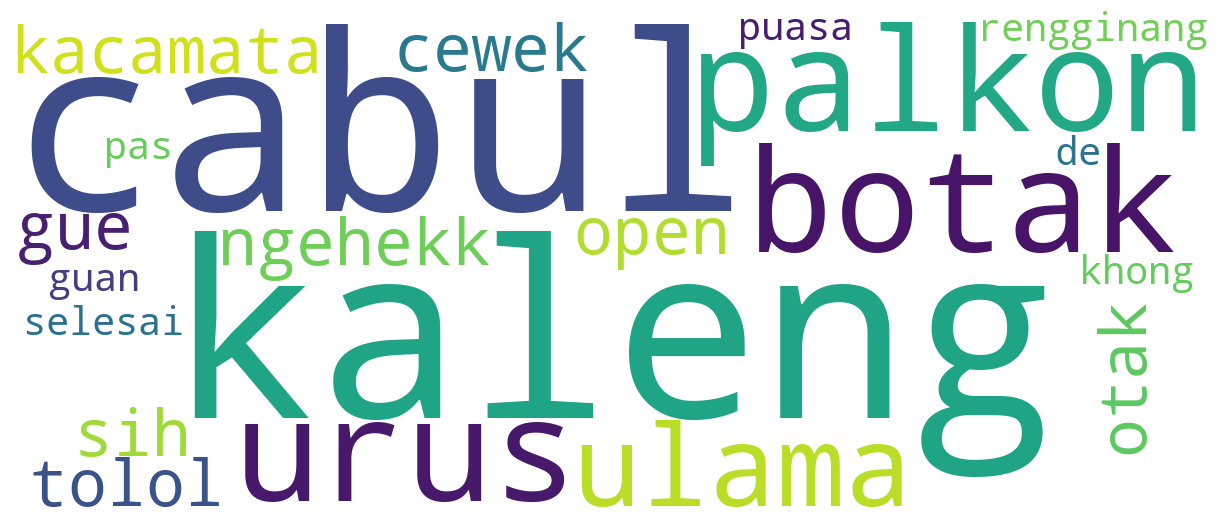

In [5]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

for label in df.columns[1:]:
    tweets = df['Tweet']
    tokens_array = tweets[df[label] == 1].str.split(' ')
    if len(tokens_array) == 0:
        print('No word had to shown')
        continue
    flatten_token = [token for tokens in tokens_array for token in tokens]
    print(flatten_token)
    words = ' '.join(flatten_token)

    wordcloud = WordCloud(width=1200, height=500, background_color='white', stopwords=stopwords, min_font_size=10).generate(words)

    plt.figure(figsize=(12, 5), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [6]:
df.isna().sum()
df.dropna(inplace=True)

In [7]:
df[['HS', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Gender']].value_counts()

HS  HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Gender
0   0              0         0            0        0            4996
1   1              0         0            0        0             483
    0              1         0            0        0             182
    1              0         1            0        0              27
    0              1         1            0        0              14
                             0            1        0               4
    1              0         0            0        1               4
    0              1         0            0        1               2
                             1            1        0               1
    1              0         1            1        0               1
dtype: int64

In [8]:
# Remove unnecessary scraped twitter subtsring

df['Tweet'] = df['Tweet'].str.replace('hyperte', ' ')
df['Tweet'] = df['Tweet'].str.replace('transfer', ' ')
df['Tweet'] = df['Tweet'].str.replace('protocol', ' ')
df['Tweet'] = df['Tweet'].str.replace('over', ' ')
df['Tweet'] = df['Tweet'].str.replace('secure', ' ')
df['Tweet'] = df['Tweet'].str.replace('socket', ' ')
df['Tweet'] = df['Tweet'].str.replace('layer', ' ')
df['Tweet'] = df['Tweet'].str.replace('t co', ' ')
df['Tweet'] = df['Tweet'].str.replace('yperte', ' ')
df['Tweet'] = df['Tweet'].str.replace('srite', ' ')
df['Tweet'] = df['Tweet'].str.replace('ype e', ' ')


In [9]:
# Remove last substring that unnecessary

df['Tweet'] = df['Tweet'].str.split(' ').apply(lambda x: ' '.join(x[:-1]) if len(x) > 1 else x)
df['Tweet'] = df['Tweet'].str.strip()

In [10]:
df = df[(df['Tweet'] != '')]
df = df.dropna()
df.shape

(4875, 7)

In [12]:
df.value_counts()

Tweet                                                                  HS  HS_Individual  HS_Group  HS_Religion  HS_Race  HS_Gender
pagi                                                                   0   0              0         0            0        0            61
selamat pagi                                                           0   0              0         0            0        0            29
selamat                                                                0   0              0         0            0        0            28
pagi mbak                                                              0   0              0         0            0        0            27
selamat pagi mbak                                                      0   0              0         0            0        0            22
                                                                                                                                       ..
indonesia maju indonesia tumbuh dirgahay

In [13]:
train, test = train_test_split(df[df['HS'] == 1], test_size=0.2)

X_train = train.Tweet
X_test = test.Tweet

In [14]:
clf1 = LogisticRegression(n_jobs=1, C=1e5)
labels = ['HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race', 'HS_Gender']
for label in labels:
    if train[label].nunique() > 1:
        vect = CountVectorizer()
        vect_train = vect.fit_transform(X_train)
        vect_test = vect.transform(X_test)

        tf = TfidfTransformer()
        tf_train = tf.fit_transform(vect_train)
        tf_test = tf.transform(vect_test)
        print(train[label].nunique())

        clf1.fit(tf_train, train[label])
        print(train[label])
        y_pred = clf1.predict(tf_test)
        
        print('Prediction of {} accuracy: {}'.format(label, accuracy_score(test[label], y_pred)))
        print(classification_report(test[label], y_pred))
        cnf = confusion_matrix(test[label], y_pred)
        plt.figure(figsize=(4, 4))
        sns.heatmap(cnf, annot=True, cmap='crest', vmax=10000, fmt='d')

2
2
2
2
2


Prediction of HS_Individual accuracy: 0.7703703703703704
              precision    recall  f1-score   support

           0       0.60      0.64      0.62        39
           1       0.85      0.82      0.84        96

    accuracy                           0.77       135
   macro avg       0.72      0.73      0.73       135
weighted avg       0.78      0.77      0.77       135

Prediction of HS_Group accuracy: 0.762962962962963
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        96
           1       0.58      0.64      0.61        39

    accuracy                           0.76       135
   macro avg       0.71      0.73      0.72       135
weighted avg       0.77      0.76      0.77       135

Prediction of HS_Religion accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       130
           1       0.67      0.80      0.73         5

    accuracy       

c:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


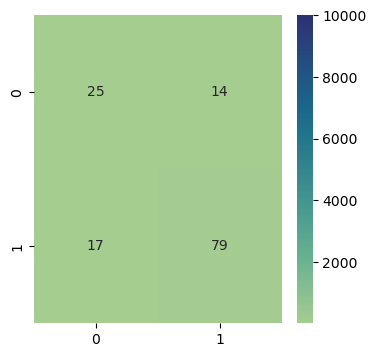

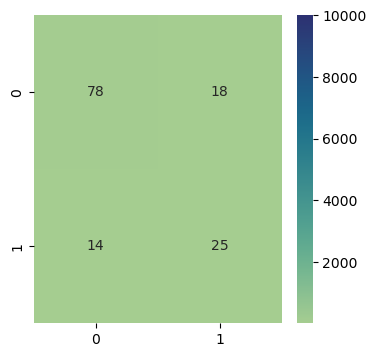

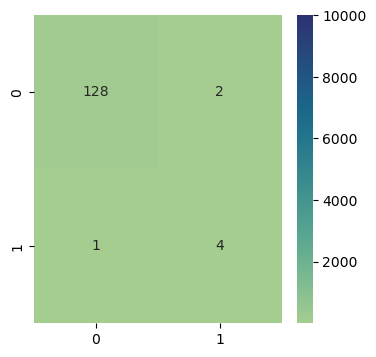

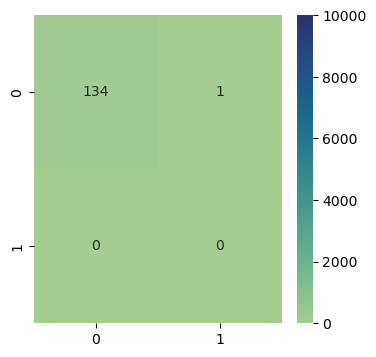

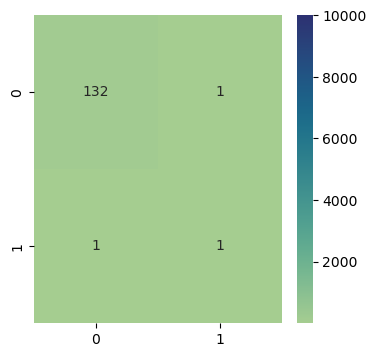

In [15]:
clf2 = SGDClassifier()

for label in labels:
    if train[label].nunique() > 1:
        vect = CountVectorizer()
        vect_train = vect.fit_transform(X_train)
        vect_test = vect.transform(X_test)

        tf = TfidfTransformer()
        tf_train = tf.fit_transform(vect_train)
        tf_test = tf.transform(vect_test)

        clf2.fit(tf_train, train[label])
        y_pred = clf2.predict(tf_test)
        
        print('Prediction of {} accuracy: {}'.format(label, accuracy_score(test[label], y_pred)))
        print(classification_report(test[label], y_pred))
        cnf = confusion_matrix(test[label], y_pred)
        plt.figure(figsize=(4, 4))
        sns.heatmap(cnf, annot=True, cmap='crest', vmax=10000, fmt='d')

In [16]:
clf3 = RidgeClassifier()

for label in labels:
    if train[label].nunique() > 1:
        vect = CountVectorizer()
        vect_train = vect.fit_transform(X_train)
        vect_test = vect.transform(X_test)

        tf = TfidfTransformer()
        tf_train = tf.fit_transform(vect_train)
        tf_test = tf.transform(vect_test)

        clf3.fit(tf_train, train[label])
        y_pred = clf3.predict(tf_test)
        
        print('Prediction of {} accuracy: {}'.format(label, accuracy_score(test[label], y_pred)))
        print(classification_report(test[label], y_pred))

Prediction of HS_Individual accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.57      0.33      0.42        39
           1       0.77      0.90      0.83        96

    accuracy                           0.73       135
   macro avg       0.67      0.61      0.62       135
weighted avg       0.71      0.73      0.71       135

Prediction of HS_Group accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        96
           1       0.57      0.33      0.42        39

    accuracy                           0.73       135
   macro avg       0.67      0.61      0.62       135
weighted avg       0.71      0.73      0.71       135

Prediction of HS_Religion accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       130
           1       0.00      0.00      0.00         5

    accuracy      

c:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Prediction of HS_Individual accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.53      0.64      0.58        39
           1       0.84      0.77      0.80        96

    accuracy                           0.73       135
   macro avg       0.69      0.71      0.69       135
weighted avg       0.75      0.73      0.74       135

Prediction of HS_Group accuracy: 0.7333333333333333
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        96
           1       0.53      0.64      0.58        39

    accuracy                           0.73       135
   macro avg       0.69      0.71      0.69       135
weighted avg       0.75      0.73      0.74       135

Prediction of HS_Religion accuracy: 0.9407407407407408
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       130
           1       0.36      0.80      0.50         5

    accuracy      

c:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


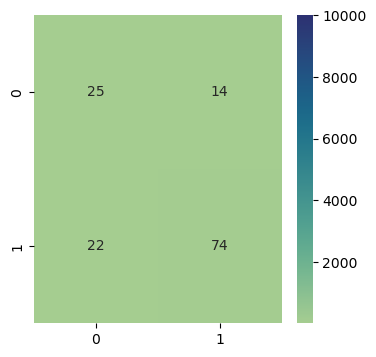

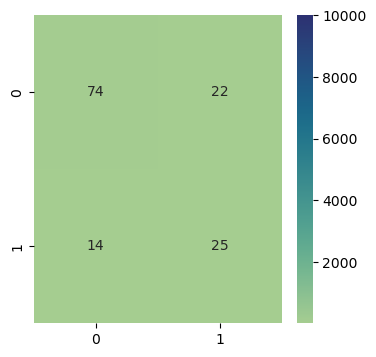

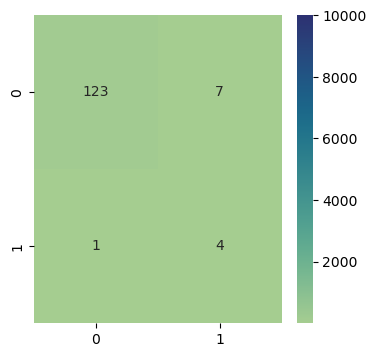

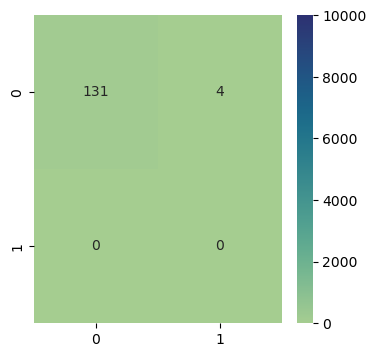

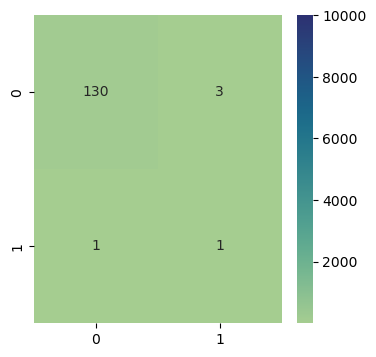

In [17]:
clf4 = Perceptron()

for label in labels:
    if train[label].nunique() > 1:
        vect = CountVectorizer()
        vect_train = vect.fit_transform(X_train)
        vect_test = vect.transform(X_test)

        tf = TfidfTransformer()
        tf_train = tf.fit_transform(vect_train)
        tf_test = tf.transform(vect_test)

        clf4.fit(tf_train, train[label])
        y_pred = clf4.predict(tf_test)
        
        print('Prediction of {} accuracy: {}'.format(label, accuracy_score(test[label], y_pred)))
        print(classification_report(test[label], y_pred))
        cnf = confusion_matrix(test[label], y_pred)
        plt.figure(figsize=(4, 4))
        sns.heatmap(cnf, annot=True, cmap='crest', vmax=10000, fmt='d')

Prediction of HS_Individual accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.33      0.15      0.21        39
           1       0.72      0.88      0.79        96

    accuracy                           0.67       135
   macro avg       0.53      0.51      0.50       135
weighted avg       0.61      0.67      0.62       135

Prediction of HS_Group accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.72      0.88      0.79        96
           1       0.33      0.15      0.21        39

    accuracy                           0.67       135
   macro avg       0.53      0.51      0.50       135
weighted avg       0.61      0.67      0.62       135

Prediction of HS_Religion accuracy: 0.9629629629629629
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       130
           1       0.50      0.20      0.29         5

    accuracy      

c:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


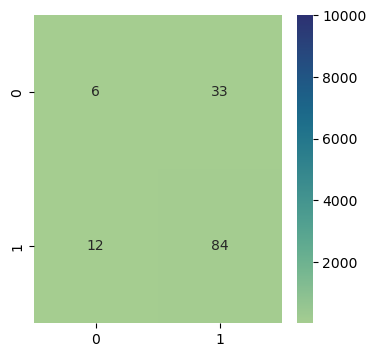

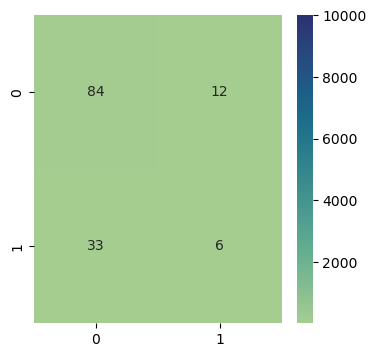

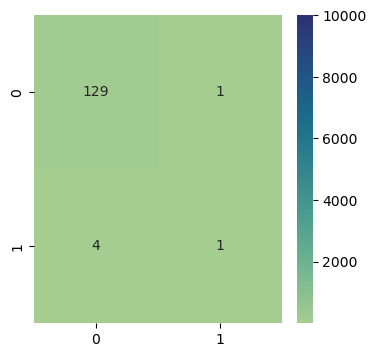

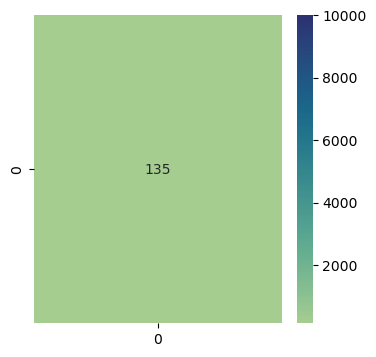

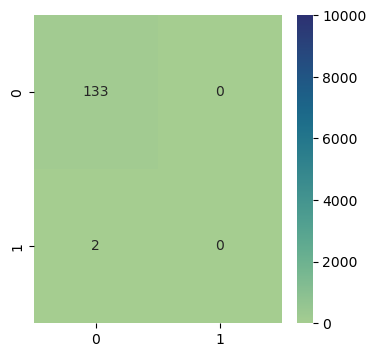

In [18]:
clf5 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

for label in labels:
    if train[label].nunique() > 1:
        vect = CountVectorizer()
        vect_train = vect.fit_transform(X_train)
        vect_test = vect.transform(X_test)

        tf = TfidfTransformer()
        tf_train = tf.fit_transform(vect_train)
        tf_test = tf.transform(vect_test)

        clf5.fit(tf_train, train[label])
        y_pred = clf5.predict(tf_test)
        
        print('Prediction of {} accuracy: {}'.format(label, accuracy_score(test[label], y_pred)))
        print(classification_report(test[label], y_pred))
        cnf = confusion_matrix(test[label], y_pred)
        plt.figure(figsize=(4, 4))
        sns.heatmap(cnf, annot=True, cmap='crest', vmax=10000, fmt='d')